# 👜 Balenciaga City Bag Price Scraper (eBay)
This notebook scrapes secondhand market listings for Balenciaga City bags from eBay.

In [28]:
!pip install requests beautifulsoup4 pandas lxml selenium webdriver-manager seaborn

You should consider upgrading via the '/Users/amynguyen/.local/share/virtualenvs/FEEDBACK_APP-OM9Fu5q7/bin/python -m pip install --upgrade pip' command.


## 📦 Scrape eBay Listings

In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0'}
base_url = "https://www.ebay.com/sch/i.html?_nkw=balenciaga+city+bag&_sop=12&_pgn={}" # ebay search link

usd_to_cad = 1.38  # fixed conversion rate

all_items = []

for page in range(1, 7):  # scrape first 6 pages
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'lxml')

    for item in soup.select('.s-item'):
        title = item.select_one('.s-item__title')
        price = item.select_one('.s-item__price')
        link = item.select_one('.s-item__link')

        if title and price and link:
            raw_price = price.text.strip().replace('$', '').replace(',', '').split(' ')[0]
            try:
                price_usd = float(raw_price)
                price_cad = round(price_usd * usd_to_cad, 2)

                all_items.append({
                    'platform': 'eBay',
                    'title': title.text,
                    'price_usd': price_usd,
                    'price_cad': price_cad,
                    'url': link['href']
                })
            except:
                continue

df = pd.DataFrame(all_items)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...


In [63]:
print(df['price_cad']) # raw prices
df['price_cad'] = pd.to_numeric(df['price_cad'], errors='coerce') # convert to numeric
df.dropna(subset=['price_cad'], inplace=True) # drop any failed conversions
df = df[df['price_cad'] > 50] # filter out low prices
print(df['price_cad'])

df.to_csv('balenciaga_ebay_market.csv', index=False) # save cleaned data
df.head()
print("✅ Done! Data saved to balenciaga_ebay_market.csv")

2       759.00
3       496.08
4      1070.88
5      1145.39
6      1145.39
        ...   
463    1276.50
464    1032.90
465    2014.80
466     896.59
467    1294.30
Name: price_cad, Length: 456, dtype: float64
2       759.00
3       496.08
4      1070.88
5      1145.39
6      1145.39
        ...   
463    1276.50
464    1032.90
465    2014.80
466     896.59
467    1294.30
Name: price_cad, Length: 456, dtype: float64
✅ Done! Data saved to balenciaga_ebay_market.csv


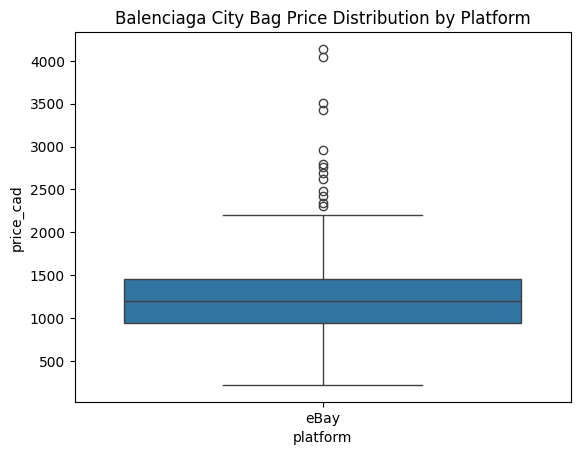

platform                                              title  price_usd  \
2       eBay  Vintage Balenciaga City Bag Hand Bag Leather Y...     550.00   
3       eBay  Authentic Balenciaga City Handbag Bag Purple L...     359.48   
4       eBay  Balenciaga Rare Two Tone Blue Greenish Lambski...     776.00   
5       eBay  BALENCIAGA City 115748 Khaki Gray Leather Shou...     829.99   
6       eBay  BALENCIAGA City 115748 Khaki Gray Leather Shou...     829.99   
..       ...                                                ...        ...   
463     eBay                           balenciaga red city bag      925.00   
464     eBay  Balenciaga City Giant Handbag 2WAY Shoulder Cl...     748.48   
465     eBay  Balenciaga Graffiti Classic City S Leather Sho...    1460.00   
466     eBay  BALENCIAGA leather shoulder bag the city from ...     649.70   
467     eBay  Balenciaga Leather Business Bag City Black Wom...     937.90   

     price_cad                                                url  

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='platform', y='price_cad')
## print(sum(df_ebay["price"]) / len(df_ebay["price"]))
plt.title("Balenciaga City Bag Price Distribution by Platform")
plt.show()

print(df)